In [64]:
import pandas as pd
import numpy as np

np.random.seed(24)

df = pd.DataFrame({
    'Planned_Duration': np.random.randint(5, 20, size=1000),
    'Actual_Duration': np.random.randint(5, 25, size=1000),
    'Team_Size': np.random.randint(2, 10, size=1000),
    'Issues': np.random.randint(0, 5, size=1000),
    'Priority': np.random.choice(['Low', 'Medium', 'High'], size=1000),
    'Dependency_Level': np.random.randint(0, 4, size=1000)
})

df['Delayed'] = (df['Actual_Duration'] > df['Planned_Duration']).astype(int)
df.to_csv("project_delay_data.csv", index=False)


In [65]:
# to under stand wat data look like
df

,Planned_Duration,Actual_Duration,Team_Size,Issues,Priority,Dependency_Level,Delayed
0,7,5,7,1,High,2,0
1,8,16,4,1,Medium,0,1
2,5,21,2,4,High,1,1
3,12,19,2,3,High,0,1
4,6,23,5,4,High,1,1
...,...,...,...,...,...,...,...
995,5,8,2,4,Medium,3,1
996,12,20,9,1,Low,1,1
997,7,9,9,4,Low,1,1
998,12,7,9,4,Medium,1,0


In [66]:
#to view the data type for each coloum, also help to find the missing value
df = pd.get_dummies(df, columns=['Priority'], drop_first=True) # converting the data type to int64 from strng .(One-Hot Encoding.)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Planned_Duration  1000 non-null   int64
 1   Actual_Duration   1000 non-null   int64
 2   Team_Size         1000 non-null   int64
 3   Issues            1000 non-null   int64
 4   Dependency_Level  1000 non-null   int64
 5   Delayed           1000 non-null   int64
 6   Priority_Low      1000 non-null   bool 
 7   Priority_Medium   1000 non-null   bool 
dtypes: bool(2), int64(6)
memory usage: 49.0 KB
None


In [67]:
# help to analysis the outliers and quick stats for the data
print(df.describe())

       Planned_Duration  Actual_Duration    Team_Size       Issues  \
count       1000.000000      1000.000000  1000.000000  1000.000000   
mean          11.767000        14.554000     5.562000     1.968000   
std            4.346447         5.832418     2.281087     1.421618   
min            5.000000         5.000000     2.000000     0.000000   
25%            8.000000         9.000000     4.000000     1.000000   
50%           12.000000        15.000000     5.500000     2.000000   
75%           16.000000        19.000000     8.000000     3.000000   
max           19.000000        24.000000     9.000000     4.000000   

       Dependency_Level      Delayed  
count       1000.000000  1000.000000  
mean           1.501000     0.610000  
std            1.123949     0.487994  
min            0.000000     0.000000  
25%            1.000000     0.000000  
50%            1.000000     1.000000  
75%            3.000000     1.000000  
max            3.000000     1.000000  


In [68]:
# train and split the data lets assign the value for X (feature) and Y (target)
# we are dropping 'Delayed' in the x , axis = 1 indicate the coloum to be from which the data need to be dropped
x = df.drop('Delayed', axis = 1)
y = df['Delayed']
y.head(5)

,Delayed
0,0
1,1
2,1
3,1
4,1


In [69]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)
model = XGBClassifier()
model.fit(X_train, y_train)

# evaulation
#X_train, y_train → practice questions and answers / X_test → final exam questions / y_pred → student’s answers / y_test → answer key for exam

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[ 76   2]
 [  3 119]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        78
           1       0.98      0.98      0.98       122

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.98      0.97      0.98       200

Accuracy: 0.975


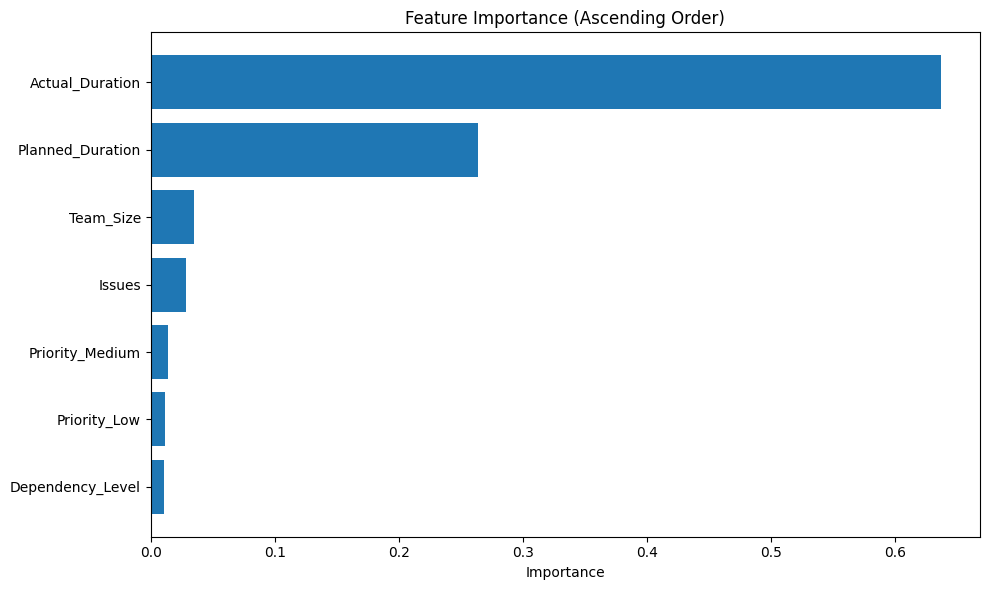

In [70]:
import matplotlib.pyplot as plt
output = pd.DataFrame({
    'Feature': x.columns,
    'Importance': model.feature_importances_
})
output = output.sort_values(by='Importance', ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(output['Feature'], output['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance (Ascending Order)')
plt.tight_layout()
plt.show()

In [71]:
# Summary
# The Project Delay Risk Predictor aims to identify whether a project task is likely to be delayed based on historical data, helping managers intervene early to reduce slippage.
#The model used was an XGBoost Classifier, selected for its strong performance on structured data, ability to capture non-linear relationships, and built-in feature importance scoring.
#To evaluate the model, metrics like accuracy, precision, recall, F1-score, and a confusion matrix were used—placing special emphasis on recall to ensure actual delays are correctly flagged.
#The model revealed that Actual_Duration was the most critical factor influencing delay predictions, followed by Planned_Duration, Issues, and Dependency_Level, while Team_Size and Priority had minimal impact.
#Overall, the model provides actionable insights to improve project planning and execution